Input is labeled data with the goal of predicting housing prices = supervised ML regression task

### Notes for improving MLR section: 
- best way to determine best model? Gridsearch for alpha + CV used R2 as the judge of best fit, and averages for mutiple iterations for each alpha value (re-running the train-test split resulted in very different 'best' alpha values). 
- kaggle uses rmse to judge best fit
- did not do a train test split for first two models
- didn't check assumptions for MLR? Besides residuals... -> target variable is skewed right
- normalization? Allows comparison, but the lecture/HW didn't normalize  ##YES BITCH
- compare f-statistic of the models? Or RMSE? Or other means of comparison besides r2
- handle outliers?

In [5]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

train = pd.read_csv('data/train.csv')
train = train.set_index('Id')
test = pd.read_csv('data/test.csv')
x_train = train.iloc[:, 0:79]
y_train = train.SalePrice

# Data Visualization: what does the data look like?

In [61]:
y_train.describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

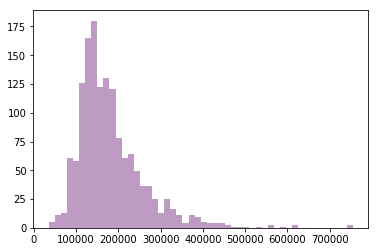

In [6]:
plt.hist(y_train, bins=50, color="#BD9BC2")

In [7]:
pd.set_option('display.max_columns', 81)
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB59301160>,
      dtype=object)

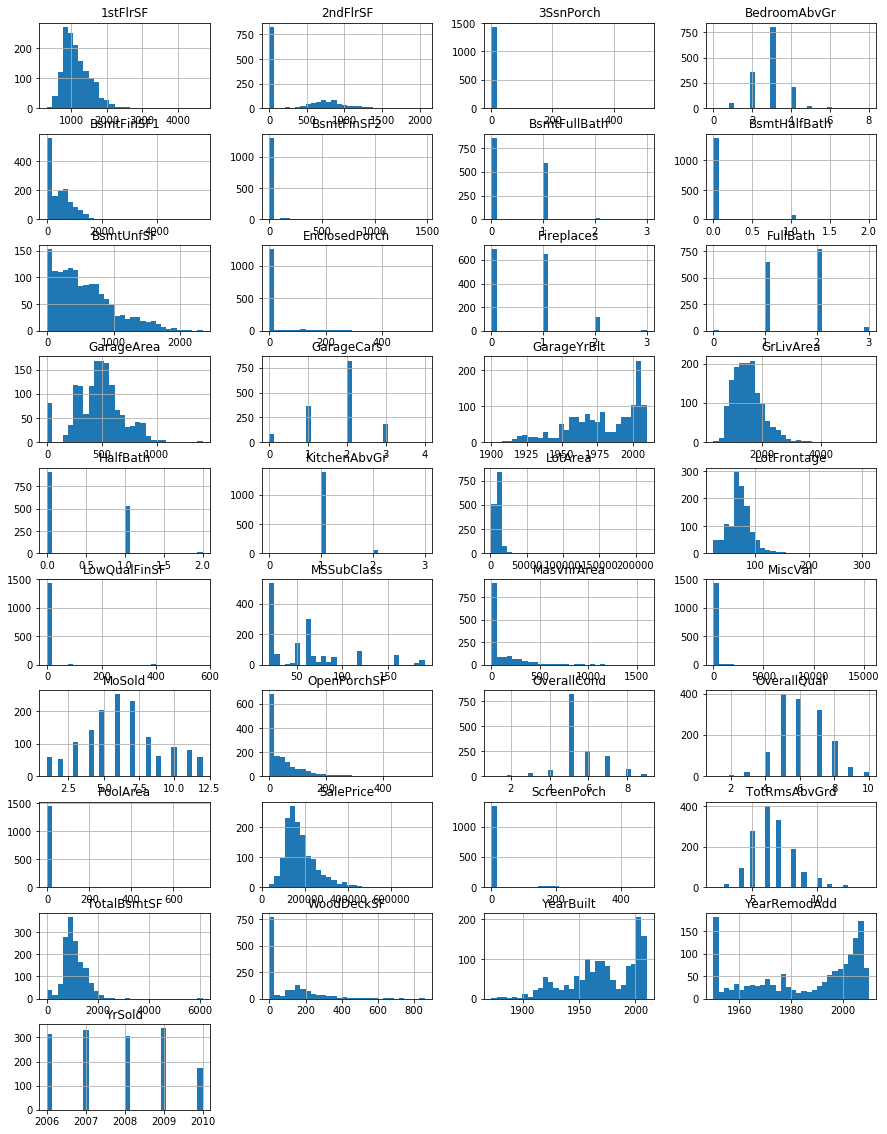

In [8]:
train.hist(layout = (10,4), bins = 30, figsize=(15,20))

# Processing Data

Continuous = OverallQual, OverallCond, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal

Ordinal Categorical = MSSubClass, YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

Nominal Categorical = MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition 

In [9]:
cont_vars= ['OverallQual', 'OverallCond', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
            'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
for v in cont_vars:
    print(x_train[v].value_counts())
    print('')

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

0       467
24       12
16        9
20        5
686       5
       ... 
1032      1
1022      1
599       1
1018      1
1904      1
Name: BsmtFinSF1, Length: 637, dtype: int64

0       1293
180        

In [11]:
ord_vars= ['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for v in ord_vars:
    print(x_train[v].value_counts())
    print('')

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64



In [12]:
nom_vars= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
       'SaleCondition']
for v in nom_vars:
    print(x_train[v].value_counts())
    print('')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Pave    1454
Grvl       6
Name: Street, dtype: int64

Grvl    50
Pave    41
Name: Alley, dtype: int64

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood

## Missingness

In [13]:
# Generate the boolean flags indicating missing rows and columns
missingRows = x_train.isnull().any(axis=1)
missingCols = x_train.isnull().any(axis=0)
print('The columns with missingness are %s' %(x_train.columns[missingCols]))

print('Number of rows with missingness:')
print(len(x_train[missingRows]))
print('Total number of rows:')
print(len(x_train))
x_train[x_train.columns[missingCols]].isnull().sum()
# probably drop columns with >1000 missing values. Not sure how to handle the other ones...

The columns with missingness are Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Number of rows with missingness:
1460
Total number of rows:
1460


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [14]:
# dummify categorical variables & narrow down starting variables (at least with missingness)
missingFeatures = ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
mask = x_train.columns.copy().drop(missingFeatures)
houseFeatures = x_train[mask].copy()
missingRows = houseFeatures.isnull().any(axis=1)
missingCols = houseFeatures.isnull().any(axis=0)
print('The columns with missingness are %s' %(houseFeatures.columns[missingCols]))
#ncbirths = ncbirths[-missingRows]  # remove rows with missingness
print('Number of rows with missingness:')
print(len(houseFeatures[missingRows]))
print('Total number of rows:')
print(len(houseFeatures))
print('Data shape after removing missingness:')
print(houseFeatures[-missingRows].shape)
# We lose 6 variables and 122 rows. Not so bad considering the original amount of missingness.
houseFeatures = houseFeatures[-missingRows]
y_train = y_train[-missingRows]

The columns with missingness are Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
Number of rows with missingness:
122
Total number of rows:
1460
Data shape after removing missingness:
(1338, 73)


In [15]:
# binary cat. variables
houseFeatures['Street'] = houseFeatures['Street'].apply(lambda x: 0 if x == 'Pave' else 1)
houseFeatures['Utilities'] = houseFeatures['Utilities'].apply(lambda x: 0 if x == 'AllPub' else 1)
houseFeatures['CentralAir'] = houseFeatures['CentralAir'].apply(lambda x: 0 if x == 'N' else 1)

In [16]:
nom_vars= ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 
       'SaleCondition']
print(len(nom_vars))
mask = missingFeatures+ ['Street', 'Utilities', 'CentralAir']
for x in mask:
    try:
        nom_vars.remove(x)
    except:
        continue
print(len(mask))
print(len(nom_vars))

43
9
35


In [17]:
# need loop for all multiple cat. variables
for variable in nom_vars:
    dummy = pd.get_dummies(houseFeatures[variable], prefix=variable)
    dummy.drop('_'.join([variable, houseFeatures[variable][1]]), axis=1, inplace=True) 
    houseFeatures = houseFeatures.drop(variable, axis=1)  # drop the original RaceMom feature
    houseFeatures = pd.concat([houseFeatures, dummy], axis=1) # concat birthFeatures and dummy horizontally
print(len(houseFeatures))
houseFeatures.head()

1338


,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,...,Electrical_Mix,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,PavedDrive_N,PavedDrive_P,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,0,0,7,5,2003,2003,196.0,706,0,150,856,1,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,20,9600,0,0,6,8,1976,1976,0.0,978,0,284,1262,1,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60,11250,0,0,7,5,2001,2002,162.0,486,0,434,920,1,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70,9550,0,0,7,5,1915,1970,0.0,216,0,540,756,1,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,60,14260,0,0,8,5,2000,2000,350.0,655,0,490,1145,1,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Preliminary Model- MLR

(array([  1.,   2.,   1.,  31., 613., 660.,  19.,   4.,   6.,   1.]),
 array([-1.82819610e+05, -1.46255688e+05, -1.09691766e+05, -7.31278439e+04,
        -3.65639219e+04,  1.88680133e-07,  3.65639219e+04,  7.31278439e+04,
         1.09691766e+05,  1.46255688e+05,  1.82819610e+05]),
 <a list of 10 Patch objects>)

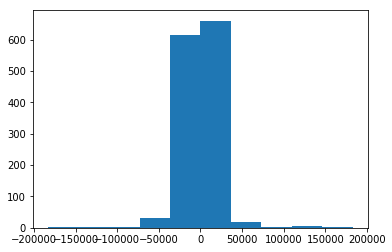

In [18]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
mlr.fit(houseFeatures, y_train)
residuals = y_train - mlr.predict(houseFeatures)
plt.hist(residuals)

In [19]:
print('R^2 is equal to %.3f' %(mlr.score(houseFeatures, y_train)))
print('RSS is equal to %.3f' %(np.sum(residuals ** 2)))
print('The intercept is %.3f' %(mlr.intercept_))
# print('The slopes are %s' %(mlr.coef_))

R^2 is equal to 0.928
RSS is equal to 596400279476.899
The intercept is -261454.386


In [20]:
import statsmodels.api as sm
x = sm.add_constant(houseFeatures)
model = sm.OLS(y_train, x)
results = model.fit()
print(results.summary()) 

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     65.09
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:39:02   Log-Likelihood:                -15222.
No. Observations:                1338   AIC:                         3.089e+04
Df Residuals:                    1115   BIC:                         3.205e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.615e+

In [ ]:
#LotArea,Street, OverallQual, OverallCond, YearBuilt, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea,
    # BedroomAbvGr, KitchenAbvGr, GarageArea, WoodDeckSF, ScreenPorch, PoolArea
# Dummy variables with SIG columns: MSZoning, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, 
    # HouseStyle, RoofStyle, RoofMatl, Exterior1st, ExterQual, Foundation, BsmtQua, BsmtExposure, BsmtFinType1,
    # KitchenQual, Functional, GarageQual, GarageCond, SaleType, 

# 2nd MLR Model: Only Significant Variables

In [21]:
reduced_var = ['LotArea', 'Street', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea',
 'MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle',
 'RoofMatl', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'Functional',
 'GarageQual', 'GarageCond', 'SaleType']
cat_var = ['MSZoning', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
 'RoofStyle', 'RoofMatl', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual',
 'Functional', 'GarageQual', 'GarageCond', 'SaleType']

reducedFeatures = x_train[reduced_var].copy()
reducedFeatures = reducedFeatures[-missingRows]
reducedFeatures['Street'] = reducedFeatures['Street'].apply(lambda x: 0 if x == 'Pave' else 1)

for variable in cat_var:
    dummy = pd.get_dummies(reducedFeatures[variable], prefix=variable)
    dummy.drop('_'.join([variable, reducedFeatures[variable][1]]), axis=1, inplace=True) 
    reducedFeatures = reducedFeatures.drop(variable, axis=1)  # drop the original RaceMom feature
    reducedFeatures = pd.concat([reducedFeatures, dummy], axis=1) # concat birthFeatures and dummy horizontally
print(reducedFeatures.shape)
reducedFeatures.head()

(1338, 144)


,LotArea,Street,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,ScreenPorch,PoolArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Foundation_BrkTil,Foundation_CBlock,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,8450,0,7,5,2003,196.0,706,856,856,854,1710,3,1,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9600,0,6,8,1976,0.0,978,1262,1262,0,1262,3,1,460,298,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11250,0,7,5,2001,162.0,486,920,920,866,1786,3,1,608,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9550,0,7,5,1915,0.0,216,756,961,756,1717,3,1,642,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,14260,0,8,5,2000,350.0,655,1145,1145,1053,2198,4,1,836,192,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([  1.,   2.,   1.,  35., 620., 652.,  16.,   5.,   5.,   1.]),
 array([-1.90400237e+05, -1.52320190e+05, -1.14240142e+05, -7.61600949e+04,
        -3.80800475e+04, -4.88944352e-08,  3.80800475e+04,  7.61600949e+04,
         1.14240142e+05,  1.52320190e+05,  1.90400237e+05]),
 <a list of 10 Patch objects>)

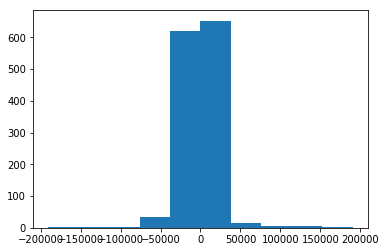

In [22]:
from sklearn import linear_model
mlr = linear_model.LinearRegression()
mlr.fit(reducedFeatures, y_train)
residuals = y_train - mlr.predict(reducedFeatures)
plt.hist(residuals)

In [23]:
print('R^2 is equal to %.3f' %(mlr.score(reducedFeatures, y_train)))
print('RSS is equal to %.3f' %(np.sum(residuals ** 2)))
print('The intercept is %.3f' %(mlr.intercept_))
# print('The slopes are %s' %(mlr.coef_))

R^2 is equal to 0.921
RSS is equal to 655024493649.407
The intercept is -694873.674


In [24]:
import statsmodels.api as sm
x = sm.add_constant(reducedFeatures)
model = sm.OLS(y_train, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     97.02
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        20:39:07   Log-Likelihood:                -15285.
No. Observations:                1338   AIC:                         3.086e+04
Df Residuals:                    1193   BIC:                         3.161e+04
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.949e+05 

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Penalized Linear Regression (Lasso)

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.set_params(alpha=1.0)
lasso.fit(houseFeatures, y_train)
lasso.score(houseFeatures,y_train)

0.9283453702457996

In [26]:
alphas = np.linspace(0.1,300,100)
lasso.set_params(normalize=True)
coefs  = []
scores = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(houseFeatures, y_train)  
        coefs.append(lasso.coef_)
        scores.append(lasso.score(houseFeatures, y_train))

coefs = pd.DataFrame(coefs, index = alphas, columns = houseFeatures.columns)  
coefs.head()

,MSSubClass,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,...,Electrical_Mix,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,GarageType_2Types,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,PavedDrive_N,PavedDrive_P,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0.100000,-47.672073,0.807879,-48036.445780,-36308.647625,6674.332128,6140.986578,319.076174,63.981290,19.614429,21.646322,10.979950,2.500827,16.954783,3759.940927,37.102884,57.184093,2.630033,12.595404,708.978617,585.810804,2982.828204,258.575462,-3560.634829,-16738.345451,1226.728018,1942.377331,-20.752588,4180.179067,17.727373,12.485894,2.719152,0.931674,27.941395,27.401586,81.269712,0.150773,-431.152795,-233.995442,-32167.913441,9340.559632,...,3616.976822,25068.903119,4008.804228,2011.019572,-13261.281426,-18301.089404,-11775.764771,-10481.291236,-20473.113200,-61760.657417,-16112.704643,4540.080866,-640.908555,9748.568539,3095.630920,2521.099190,2570.551480,109800.308175,-4561.312418,3522.066384,-27426.749592,-108829.377369,-2109.035280,-3833.882822,-856.725754,-1420.048348,-3467.474833,154.570619,15551.037897,27032.659120,22662.442983,1653.144028,-1372.374995,24419.727318,26350.521174,-4319.923950,31971.514310,4792.586183,-5724.444256,-10142.513207
3.129293,-99.009364,0.711940,-35910.657567,-31072.181013,7010.920714,5833.810956,275.427968,58.387623,18.382764,18.660513,6.166463,-0.000000,17.882151,2766.914534,0.000000,10.109980,-37.371576,52.234960,774.076705,0.000000,2282.928343,-0.000000,-3133.333181,-16533.499509,1005.256299,1958.345546,0.000000,4234.782455,18.232379,10.552675,0.784791,-0.000000,21.083476,24.389532,80.577765,0.000000,-360.947863,-35.985055,-27414.160373,8765.168370,...,0.000000,24859.377655,797.460921,68.736332,-13291.991722,-14363.797444,-11481.653311,-10164.884397,-16817.880229,-56473.382102,-14806.854255,1978.442103,528.976262,4373.382998,1706.639395,1977.201733,2144.656936,91757.684004,-2781.410162,2455.612750,-7594.836100,-85846.498714,-1170.675071,-2689.757016,-195.663528,-416.555939,-2382.581052,-0.000000,10385.745116,25138.400719,17040.520645,-0.000000,-0.000000,14508.472853,23440.196989,-3805.292199,23850.429958,4188.121288,-4798.008313,0.000000
6.158586,-119.245069,0.625346,-27539.448016,-24789.777569,7458.130356,5608.465775,262.729365,67.964895,17.203025,18.206323,4.489326,-0.000000,16.657923,1494.052544,0.000000,4.189102,-38.774902,53.764490,969.974133,-0.000000,1885.315829,-0.000000,-2816.178822,-16402.725117,884.211381,1933.911140,0.000000,4420.453010,18.921234,9.024254,0.000000,-0.000000,14.289896,21.973105,79.136257,-0.000000,-314.632362,-0.000000,-22804.970388,8246.670718,...,-0.000000,25139.761110,0.000000,-0.000000,-12630.480751,-13183.056682,-11099.928710,-10086.117406,-13901.636546,-51111.123531,-14509.741150,0.000000,1178.380677,743.331276,618.258881,1383.449954,1438.025262,71967.668457,-1778.313710,1469.598001,-0.000000,-60298.411017,-258.627424,-1748.666811,-0.000000,-0.000000,-1305.866579,-0.000000,6845.798060,24209.607651,13168.397256,-0.000000,-0.000000,14533.482677,20800.785198,-3629.073127,15183.051269,3163.404632,-4288.424421,0.000000
9.187879,-113.771577,0.557388,-22761.712790,-19593.064689,7905.982522,5415.052097

Text(0, 0.5, 'slope values')

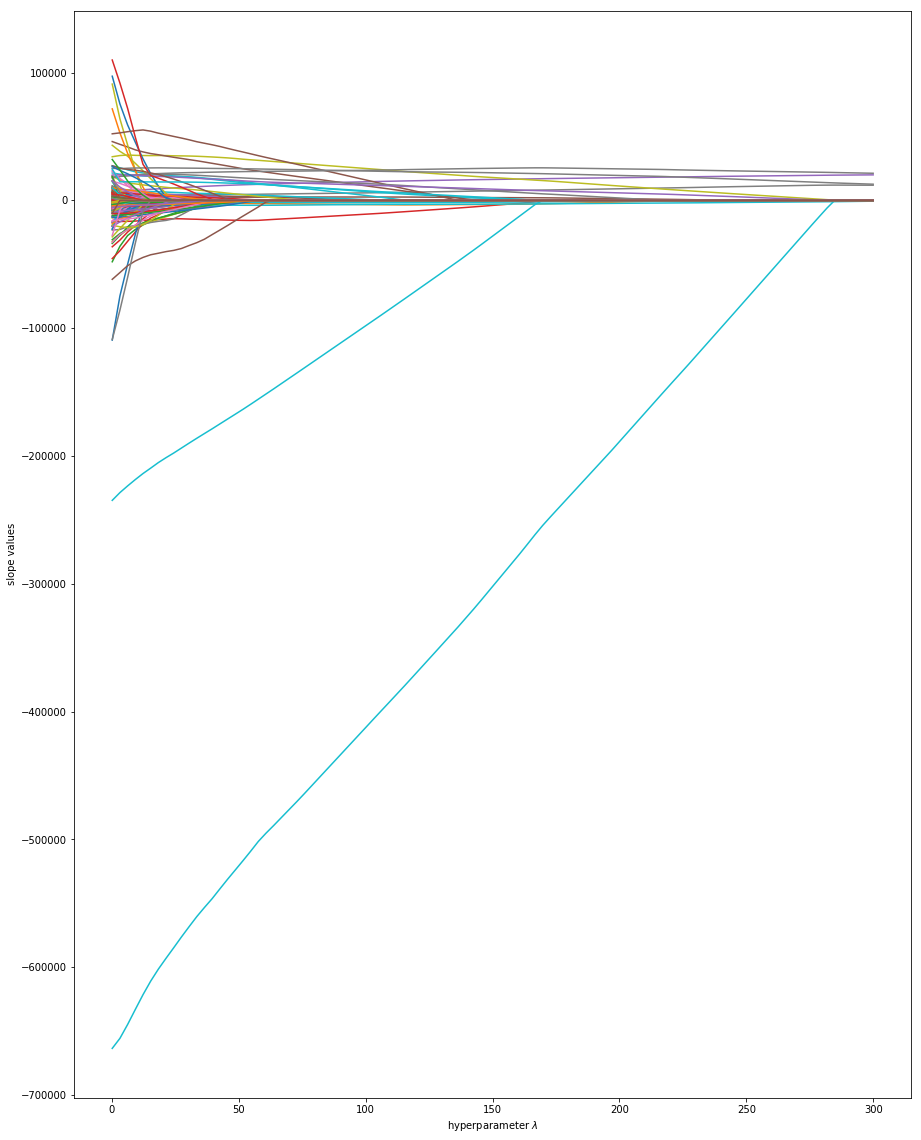

In [27]:
plt.rcParams['figure.figsize'] = (15,20)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0, 0.5, '$R^2$')

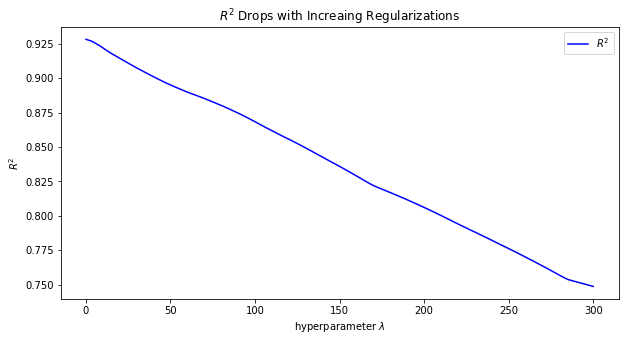

In [28]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(alphas, scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

## Selecting Best Model: GridSearch/CV vs Brute Force

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, Y_train, Y_test = train_test_split(houseFeatures,y_train,test_size=0.2)

In [35]:
lasso.set_params(normalize=True)
lasso_scores_train = []
lasso_scores_test  = []

alphas = np.linspace(0.1,300,100)

for alpha in alphas:
            lasso.set_params(alpha=alpha)
            lasso.fit(houseFeatures, y_train)
            lasso_scores_train.append(lasso.score(X_train, Y_train))
            lasso_scores_test.append(lasso.score(X_test, Y_test))
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0, 0.5, '$R^2$')

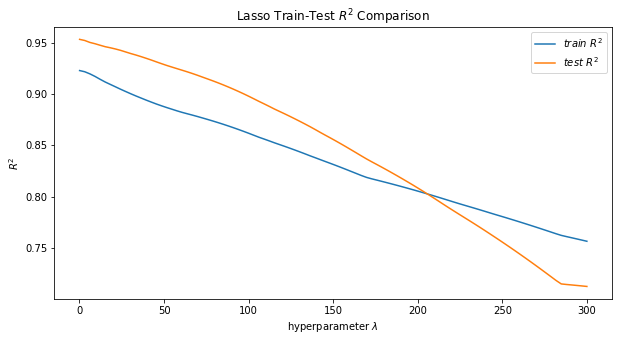

In [36]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

re-running the above for different train-test-splits results in very different graphs (and very different optimal alphas). Below gridsearch and CV are used so that we can tune alpha based on averaged results:

In [37]:
grid_para = [{
    "alpha": np.linspace(start=0.1, stop=300, num=100, dtype=int)
}]
lasso.set_params(random_state=108)
grid_search_lasso = GridSearchCV(lasso, grid_para, cv=5, scoring='r2', n_jobs=-1)
%time grid_search_lasso.fit(houseFeatures, y_train)

Wall time: 15 s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=300.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=108,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'alpha': array([  0,   3, ..., 296, 300])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [38]:
best_model = grid_search_lasso.best_estimator_
best_model

Lasso(alpha=24, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=108,
   selection='cyclic', tol=0.0001, warm_start=False)

In [39]:
best_model.fit(houseFeatures, y_train)
print('The intercept of the best model is %.4f' %(best_model.intercept_))
lassoCoef = pd.Series(best_model.coef_, index=houseFeatures.columns)
print('The slopes of the best model are \n %s' %(lassoCoef))

The intercept of the best model is -757343.7582
The slopes of the best model are 
 MSSubClass                -106.578018
LotArea                      0.397930
Street                  -10327.270693
Utilities                   -0.000000
OverallQual               9733.126774
                             ...     
SaleCondition_Abnorml    -2893.784693
SaleCondition_AdjLand        0.000000
SaleCondition_Alloca         0.000000
SaleCondition_Family     -2165.443757
SaleCondition_Partial        0.000000
Length: 226, dtype: float64


## Feature Importance

In [40]:
pd.set_option('display.max_rows', 500)
sortedCoefs = np.abs(lassoCoef).sort_values(ascending=False)
print(sortedCoefs)

RoofMatl_ClyTile         585599.586759
Condition2_PosN          198077.716190
RoofMatl_WdShngl          50161.447799
Functional_Sev            39252.883997
Neighborhood_NoRidge      34878.092532
Neighborhood_StoneBr      33797.179065
KitchenQual_Ex            25314.881369
BsmtQual_Ex               21361.182166
ExterQual_Ex              20314.250838
Neighborhood_NridgHt      19165.151324
Neighborhood_Crawfor      18787.850409
BsmtExposure_Gd           18307.019644
SaleType_Con              16848.764387
Exterior1st_BrkComm       14630.424818
SaleType_New              14404.133115
KitchenAbvGr              14368.358747
GarageQual_Ex             13016.919338
MSZoning_C (all)          11134.583600
Condition1_RRAe           10980.505676
Street                    10327.270693
OverallQual                9733.126774
Exterior1st_BrkFace        9683.888125
Functional_Maj1            8728.052123
BldgType_Duplex            7625.408710
GarageType_2Types          7435.386727
Functional_Min1          

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(houseFeatures,y_train,test_size=0.2)
best_model.fit(X_train, Y_train)
print(best_model.score(X_train, Y_train))
#best_model.fit(X_test, Y_test)
print(best_model.score(X_test, Y_test))

0.9117368528892713
0.9080747506256278


# Preliminary Model - Decision Trees

In [62]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(houseFeatures,y_train,test_size=0.2)
tree_model.fit(X_train, Y_train)
print(tree_model.score(X_train, Y_train))
print(tree_model.score(X_test, Y_test))

1.0
0.7560972689453201


In [64]:
from sklearn.model_selection import GridSearchCV
grid_para_tree = [{
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_tree.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1460, 1338]